In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('F:\Rishabh Mishra\Python\EDA Project\Sales Data.csv', encoding='ISO-8859-1')


<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\User\AppData\Local\Temp\ipykernel_6752\1630342418.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_csv('F:\Rishabh Mishra\Python\EDA Project\Sales Data.csv', encoding='ISO-8859-1')


In [19]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [30]:
df.shape

(11239, 13)

In [9]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [33]:
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object

In [39]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [17]:
df.describe(include='object')

,Cust_name,Product_ID,Gender,Age Group,State,Zone,Occupation,Product_Category
count,11251,11251,11251,11251,11251,11251,11251,11251
unique,1250,2351,2,7,16,5,15,18
top,Vishakha,P00265242,F,26-35,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,42,53,7842,4543,1946,4296,1588,2655


In [24]:
# Drop black columns

df.drop(['Status','unnamed1'],axis=1, inplace=True)

KeyError: "['Status', 'unnamed1'] not found in axis"

In [29]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [28]:
# Deleted null values

df.dropna(inplace=True)

In [40]:
# Changed format from float to int

df['Amount'] = df['Amount'].astype('int')

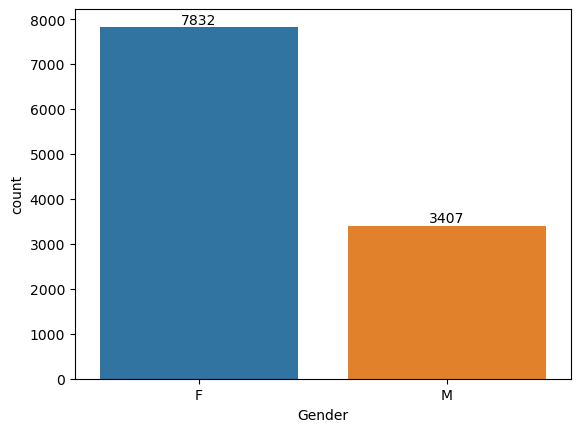

In [64]:
ax = sns.countplot(data=df, x='Gender', hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

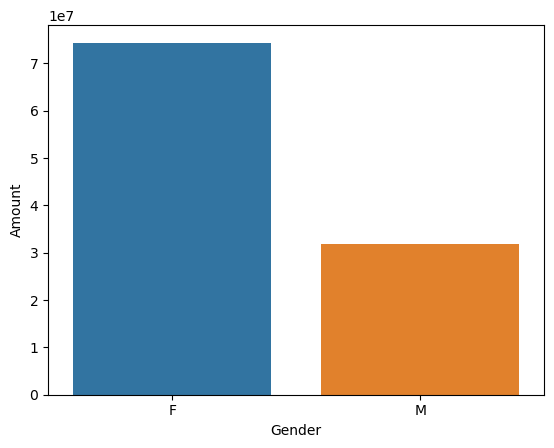

In [65]:
sales_gen = df.groupby('Gender')['Amount'].sum().reset_index()

sns.barplot(x='Gender',y='Amount', data = sales_gen, hue='Gender')

plt.show()

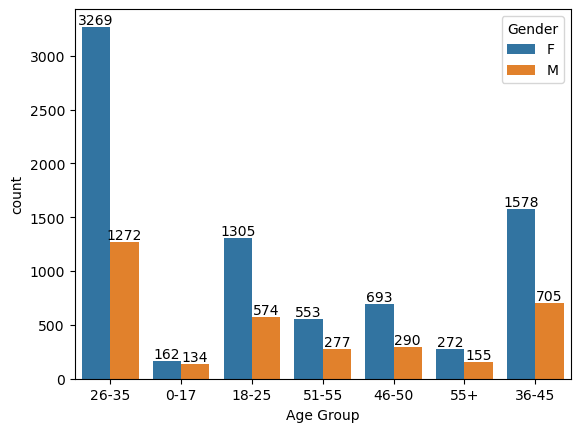

In [81]:
ax = sns.countplot(data=df, x='Age Group', hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

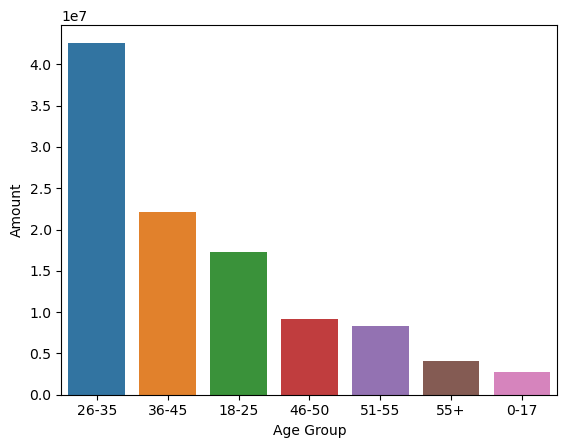

In [88]:
sales_age = df.groupby('Age Group')['Amount'].sum().sort_values(ascending=False).reset_index()

sns.barplot(x='Age Group',y='Amount', data = sales_age, hue='Age Group')

plt.show()

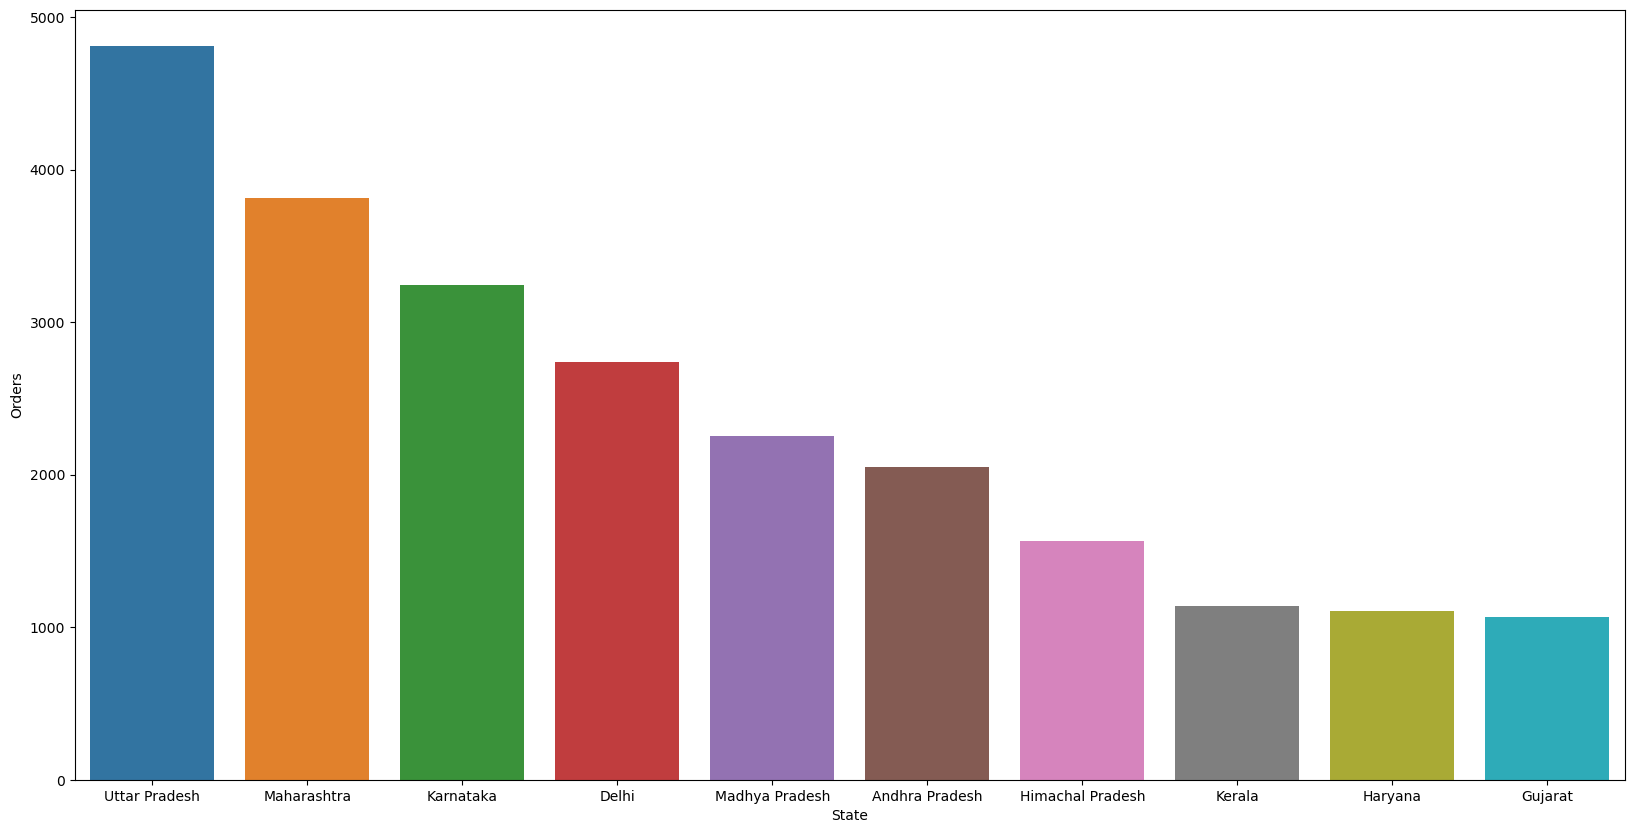

In [94]:
sales_state = df.groupby('State')['Orders'].sum().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(20, 10))

sns.barplot(x='State',y='Orders', data = sales_state, hue='State')

plt.show()

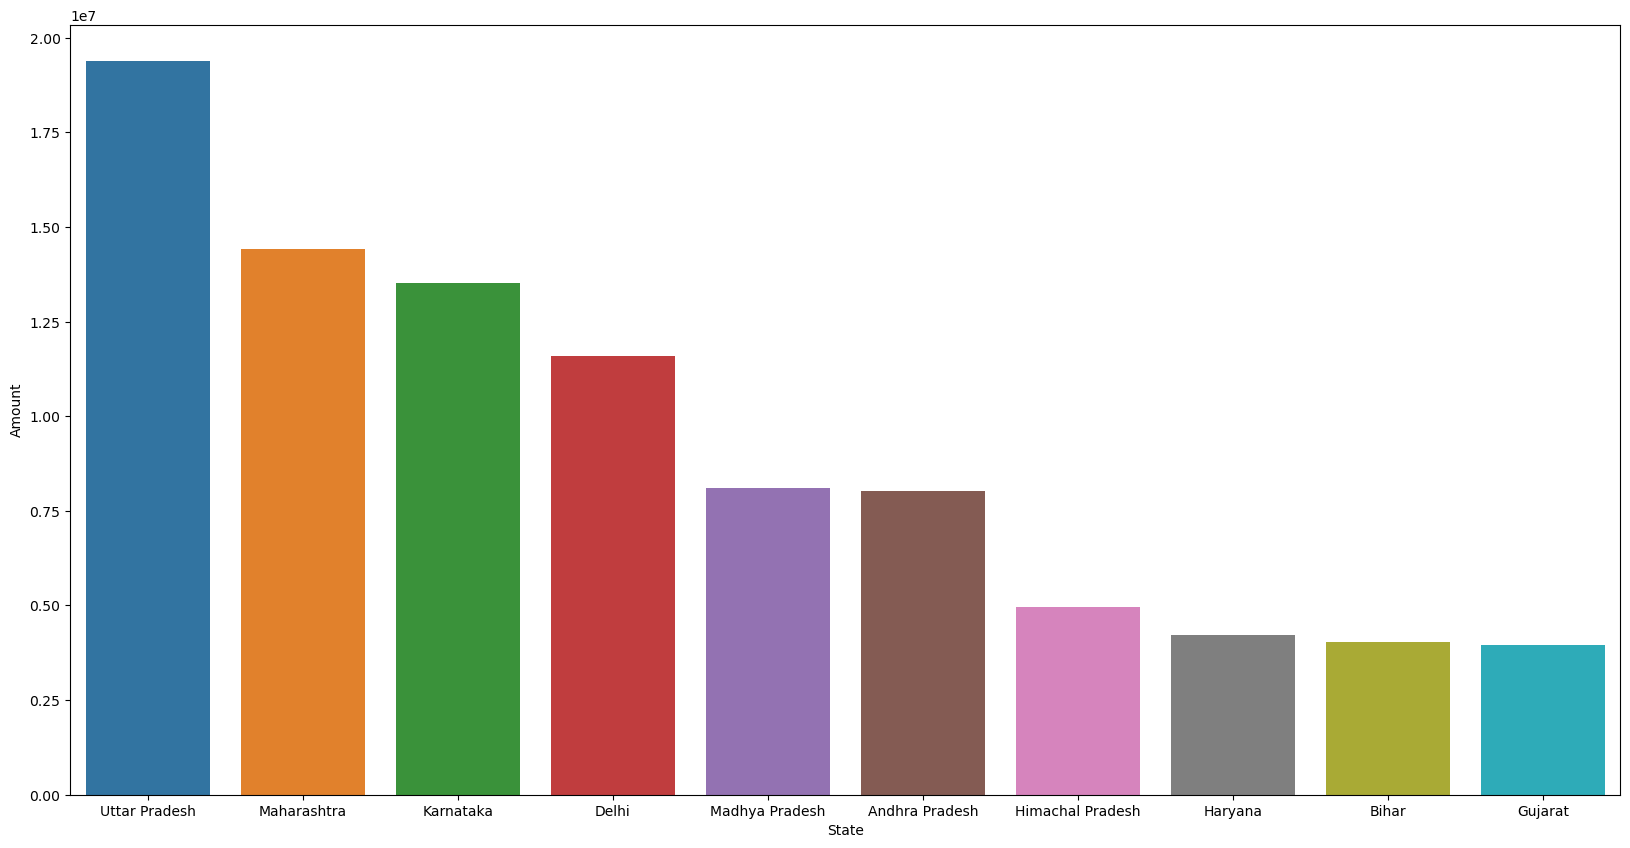

In [95]:
sales_state = df.groupby('State')['Amount'].sum().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(20, 10))

sns.barplot(x='State',y='Amount', data = sales_state, hue='State')

plt.show()

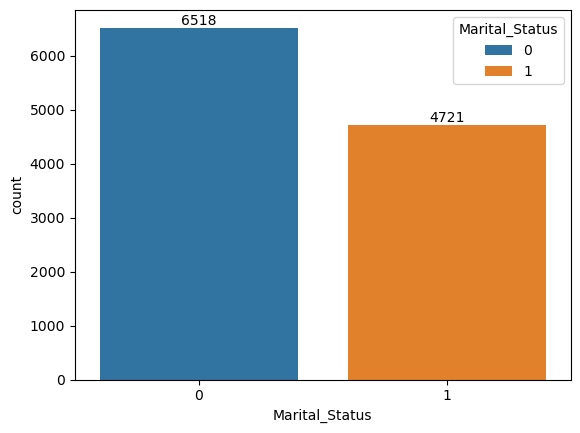

In [96]:
ax = sns.countplot(data=df, x='Marital_Status', hue='Marital_Status')

for bars in ax.containers:
    ax.bar_label(bars)

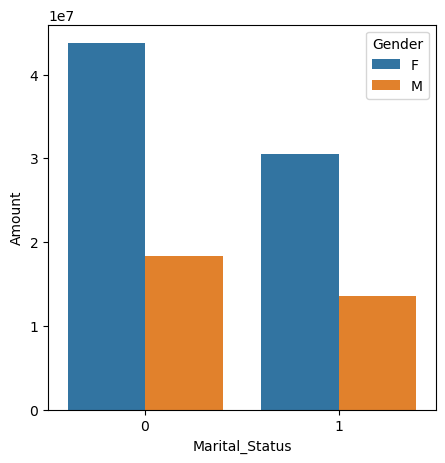

In [107]:
sales_state = df.groupby(['Marital_Status','Gender'])['Amount'].sum().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(5, 5))

sns.barplot(x='Marital_Status',y='Amount', data = sales_state, hue='Gender')

plt.show()

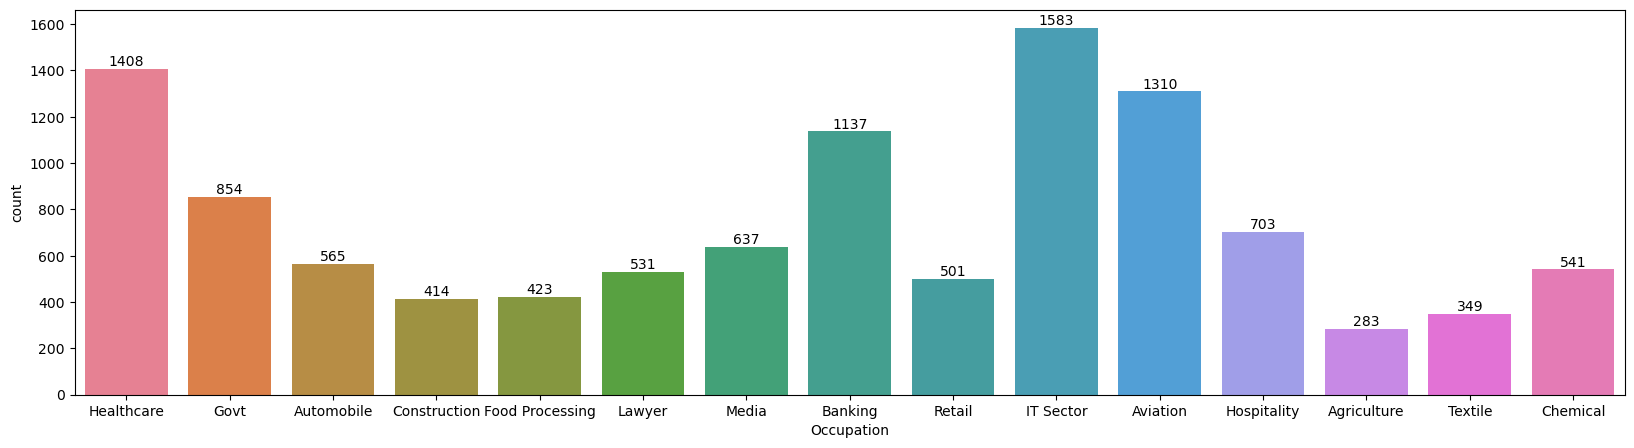

In [111]:
plt.figure(figsize=(20, 5))

ax = sns.countplot(data=df, x='Occupation', hue='Occupation')


for bars in ax.containers:
    ax.bar_label(bars)

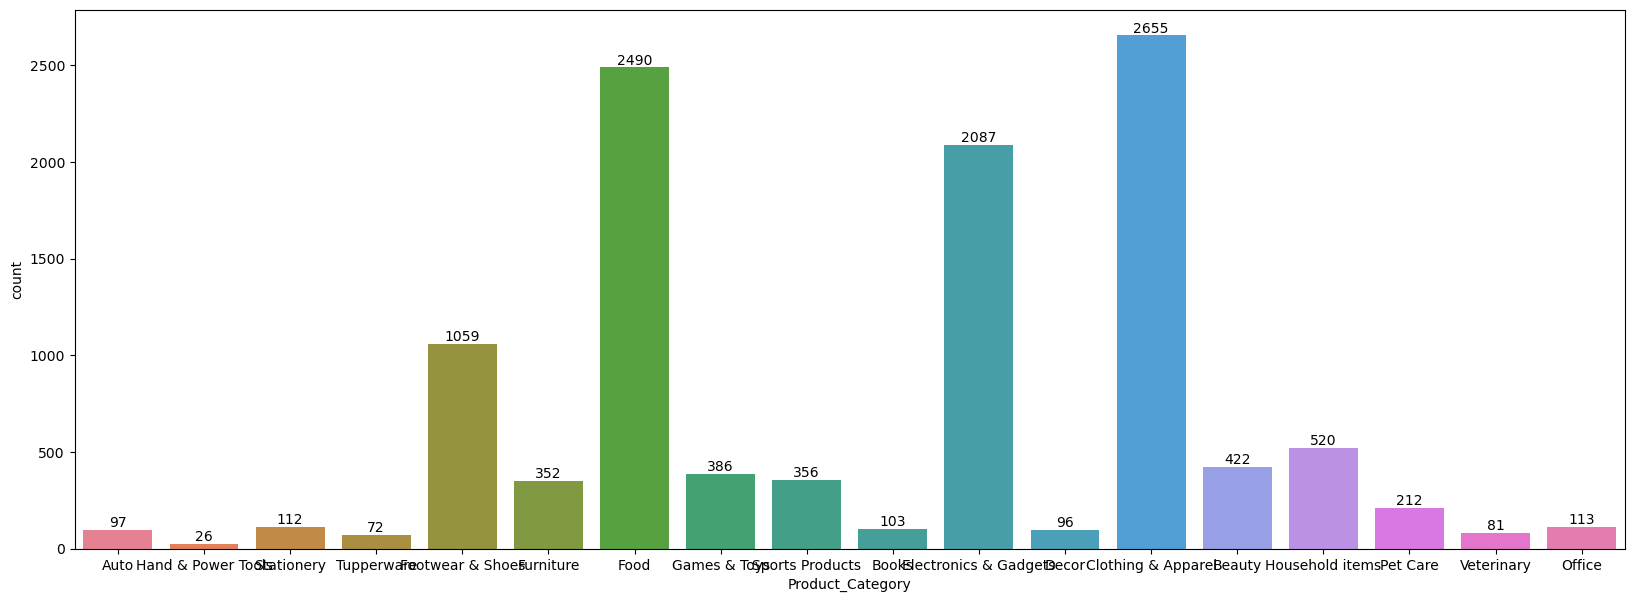

In [113]:
plt.figure(figsize=(20, 7))

ax = sns.countplot(data=df, x='Product_Category', hue='Product_Category')


for bars in ax.containers:
    ax.bar_label(bars)

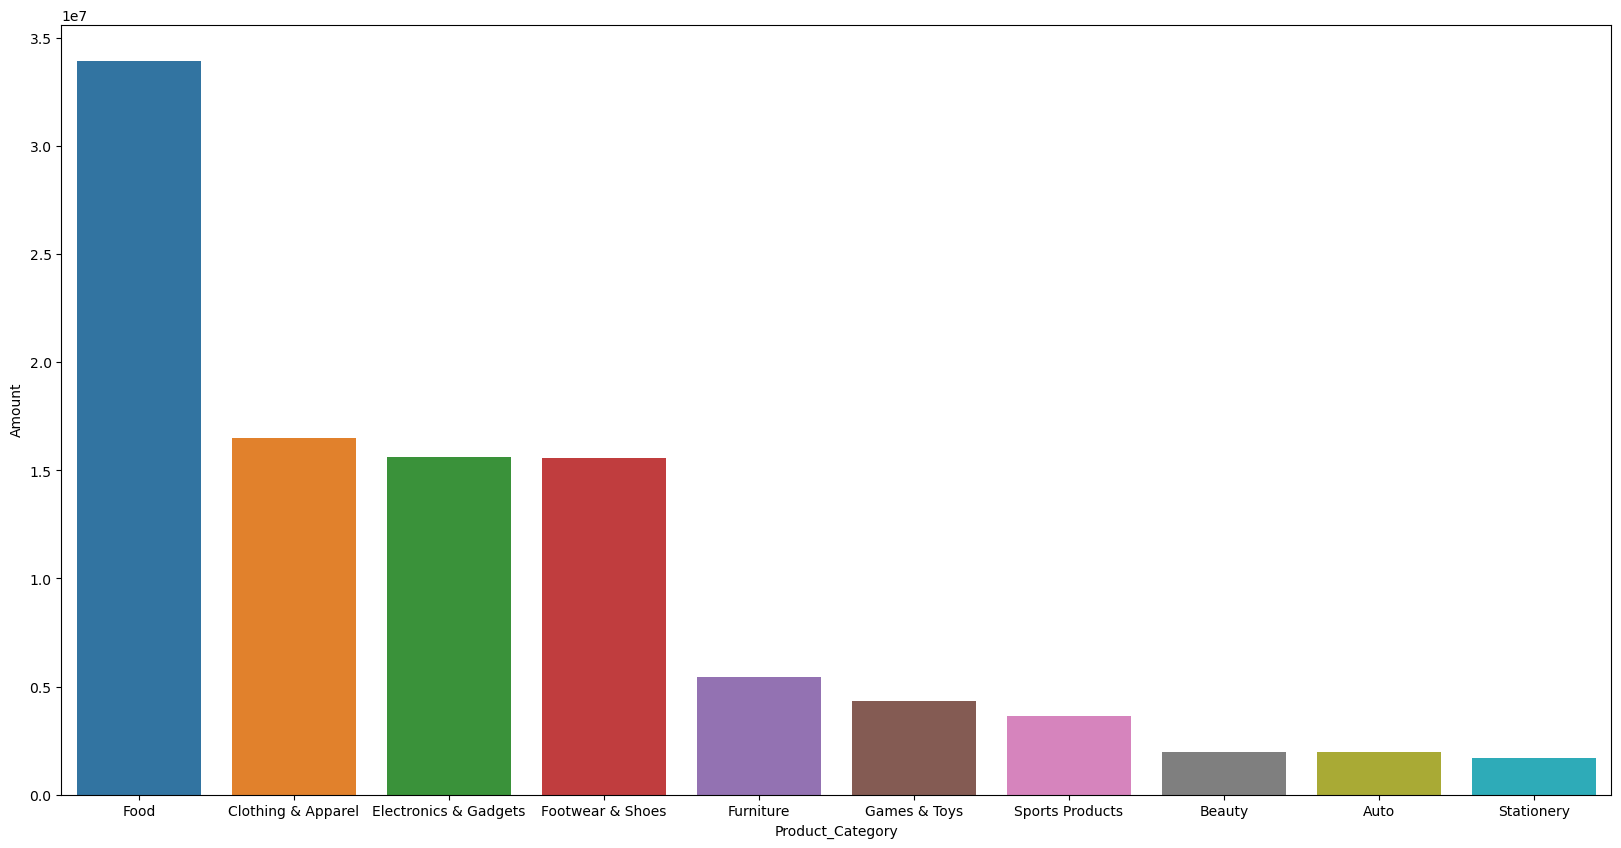

In [114]:
sales_state = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(20, 10))

sns.barplot(x='Product_Category',y='Amount', data = sales_state, hue='Product_Category')

plt.show()

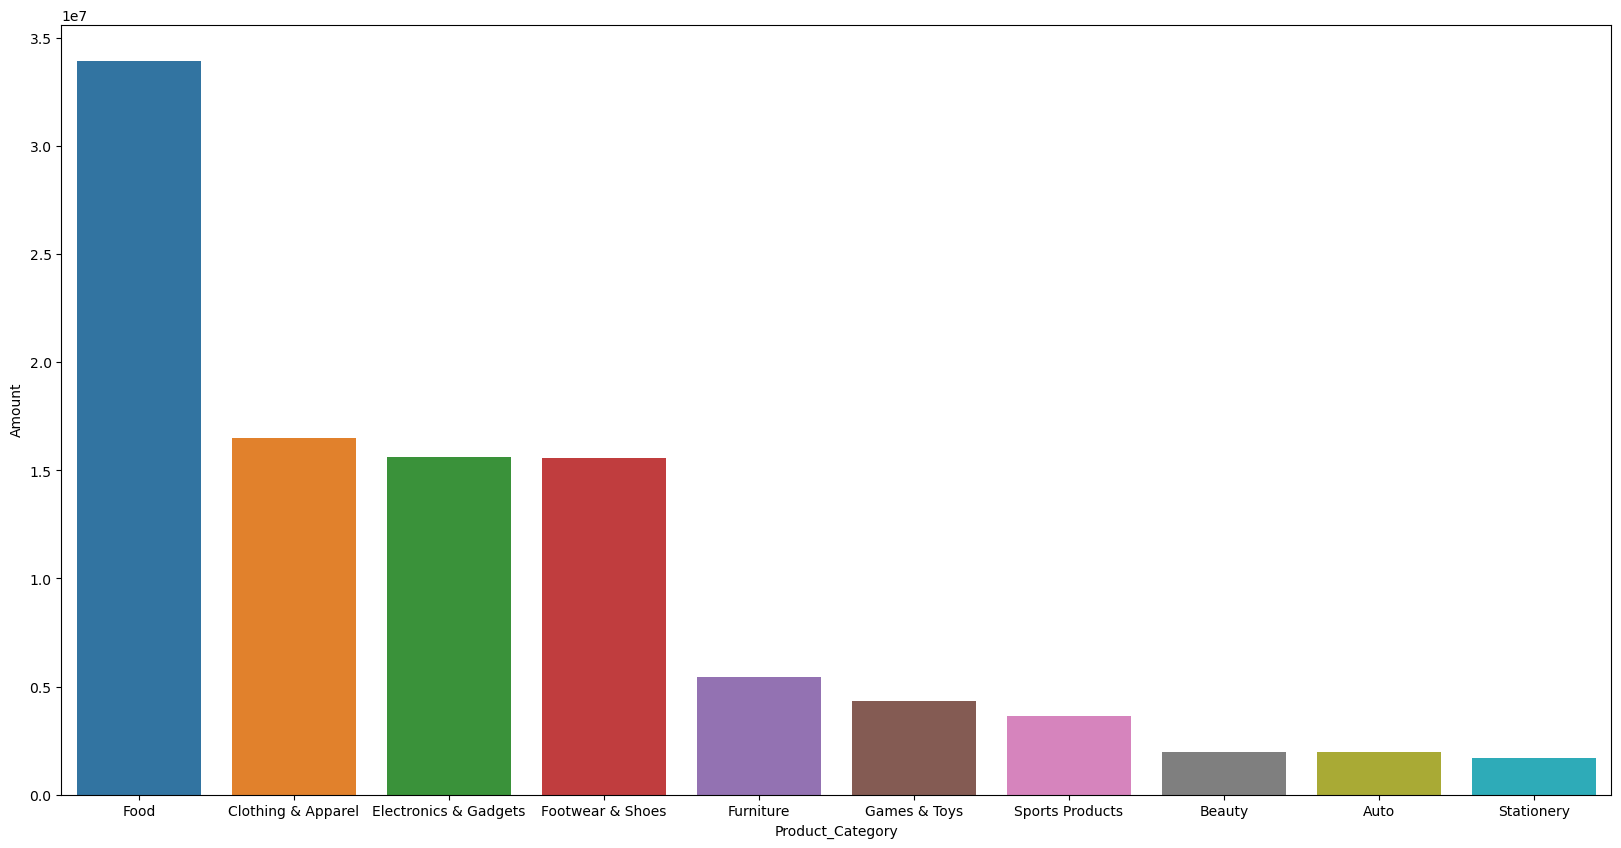

In [114]:
sales_state = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(20, 10))

sns.barplot(x='Product_Category',y='Amount', data = sales_state, hue='Product_Category')

plt.show()